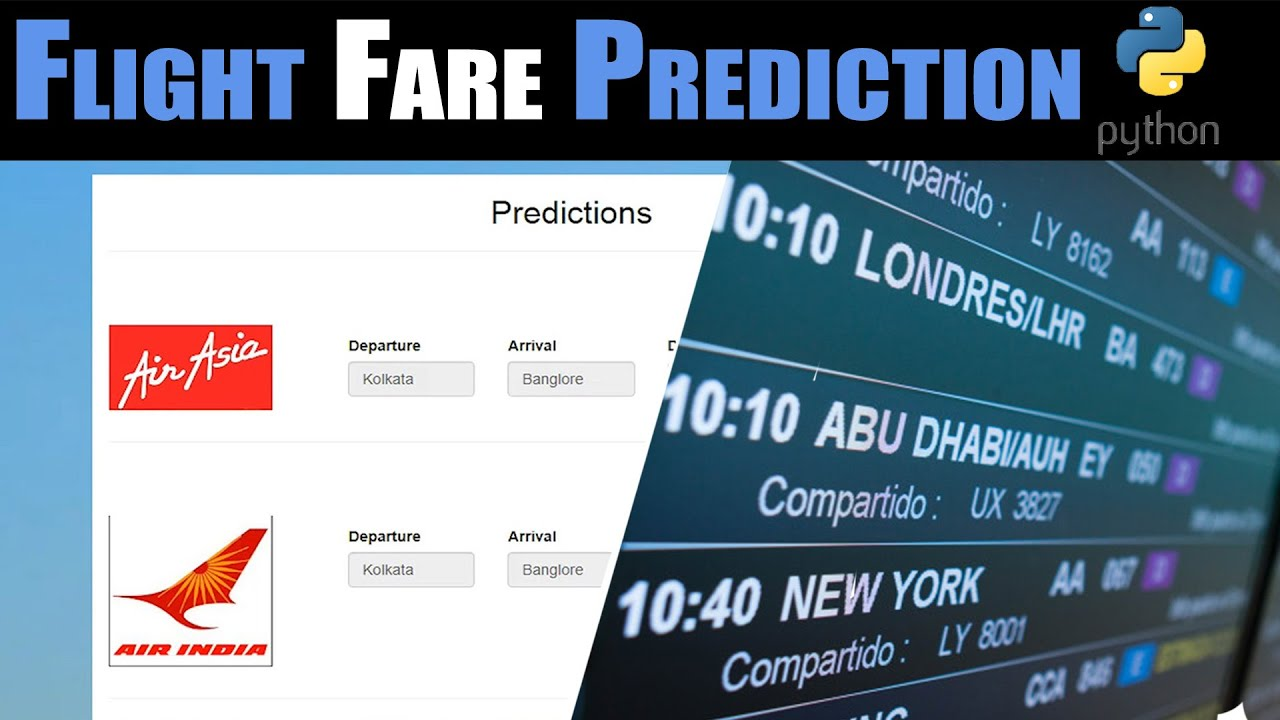

### Description

Guessing the flight prices can be very hard sometimes, today we might see a price but when we check out the same flight the price might be different. We might have often heard travelers saying that flight ticket prices are so unpredictable. Here we will be provided with different prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Problem Statemtent

We will use these flight records to determine flight prices based on the different parameters.

### Data Description

Columns:

    Airline
    Date_of_Journey
    Source
    Destination
    Route
    Dep_Time
    Arrival_Time
    Duration
    Total_Stops
    Additional_Info
    Price

### Libraries Used

* Numpy
* Pandas
* Matplotlib
* Seaborn
* Math
* Statistics
* Sklearn

### Steps Performed

* Importing the Libraries
* Loading the Dataset
* Exploratory Data Analysis
* Feature Engineering 
* Visual Analysis
* Label Encoing
* Splitting target and Features
* Scaling using Standard Scaler
* Train Test split
* Model Building
* Build Model using Ridge regression
* Build Model using Lasso regression
* Build Model using Decision Tree
* Build Model using Random Forest
* Evaluating the results
* Model Ensembling
* Generating Prediction on final test data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from statistics import mean

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

### Loading the Training Data

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


### Exploratory Data Analysis (EDA)

In [3]:
# Total number of columns in the dataset
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
# Information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# To know more about the dataset
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Checking if there is some null values or not
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping NAN values
train_df.dropna(inplace = True)

In [8]:
# Duplicate values
train_df[train_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
# Dropping duplicate values
train_df.drop_duplicates(keep='first',inplace=True)

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_df.shape

(10462, 11)

In [12]:
#defining the function for the value counts
def valuecounts(col):
    return train_df[col].value_counts()

In [13]:
#calling the function for airlines column
valuecounts("Airline")

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
#defining the function to combine classes as others which counts are less than 50
airlines_counts = valuecounts("Airline")
airlines_counts_lessthan50 = airlines_counts[airlines_counts<50]


def handle_Airlines(value):
    if (value in airlines_counts_lessthan50):
        return "Others"
    else:
        return value
    

    
#calling the defined function
train_df["Airline"] = train_df["Airline"].apply(handle_Airlines)
valuecounts("Airline")

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
Others                 23
Name: Airline, dtype: int64

In [15]:
valuecounts("Additional_Info")

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [16]:
#These less counts will act as outliers so put them into no info
addinfo_counts = valuecounts("Additional_Info")
addinfo_counts_lessthan20 = addinfo_counts[addinfo_counts<20]


def handle_addinfo(value):
    if (value in addinfo_counts_lessthan20):
        return "No info"
    else:
        return value

    
    
#calling the defined function
train_df["Additional_Info"] = train_df["Additional_Info"].apply(handle_addinfo)
valuecounts("Additional_Info")

No info                         8218
In-flight meal not included     1926
No check-in baggage included     318
Name: Additional_Info, dtype: int64

In [17]:
valuecounts("Source")

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [18]:
valuecounts("Destination")

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
valuecounts("Total_Stops")

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
train_df.loc[(train_df["Total_Stops"]=="4 stops")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,No info,17686


In [21]:
train_df.drop([9182],axis=0,inplace=True)
valuecounts("Total_Stops")

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
Name: Total_Stops, dtype: int64

In [22]:
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [23]:
# Loading excel file for test dataset
test_df = pd.read_excel("Test_set.xlsx")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [24]:
# Total number of columns in the dataset
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [25]:
# Information about the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [26]:
# To know more about the dataset
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [27]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Feature Engineering

In [28]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [29]:
# In Duration convert hours in minutes

train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [30]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [31]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info


In [32]:
# From Date_of_Journey extracting date and month
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [33]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [34]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,24,6


In [35]:
#extracting Hours and minutes from Dep_Time
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [36]:
#similarly from arrival time
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [37]:
train_df["Total_Stops"].replace({"non-stop":0, "2 stops":2,"1 stop":1,"3 stops":3},inplace=True)

In [38]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [39]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


### Data Visualisation 

In [40]:
train_df.drop(train_df[train_df['Price'] >= 40000].index, inplace = True)

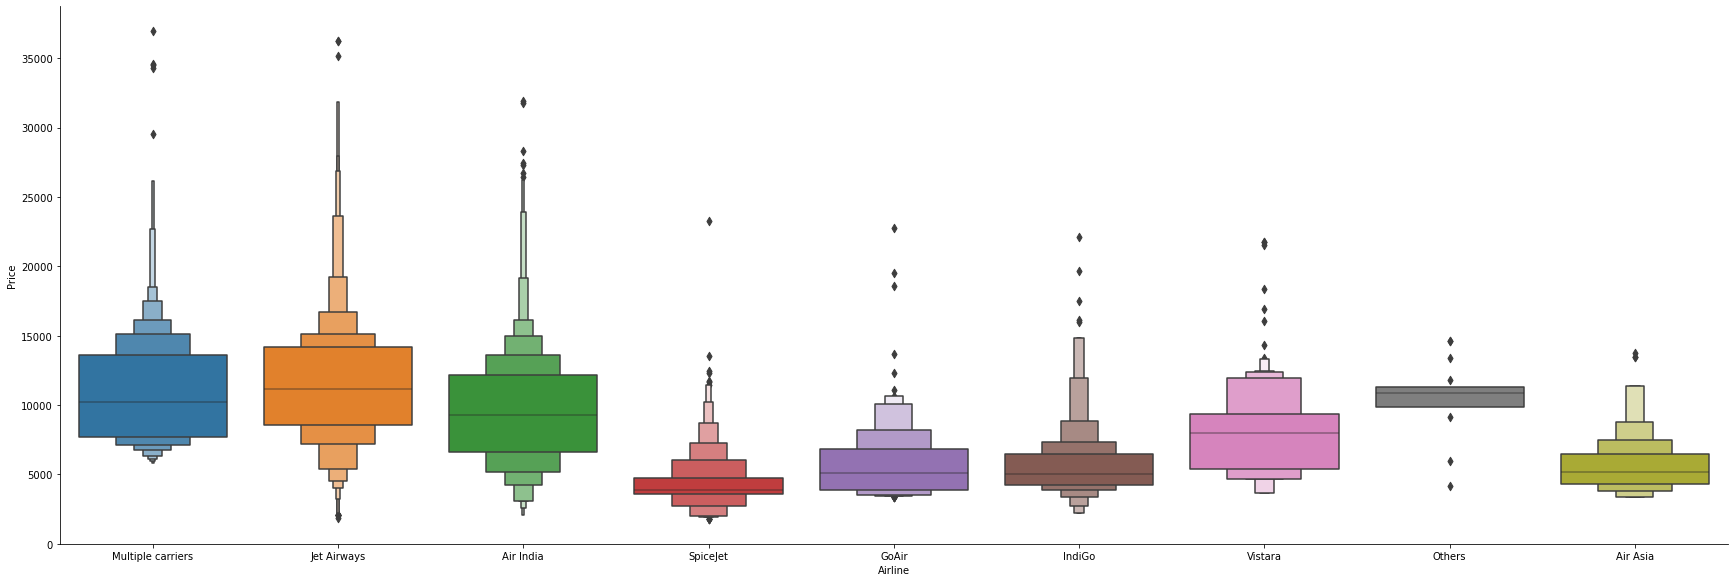

In [41]:
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

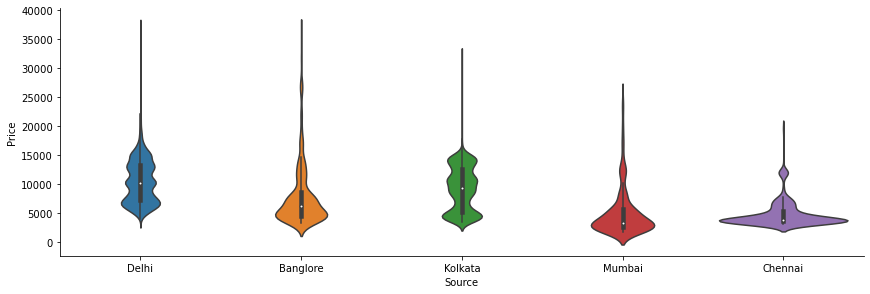

In [42]:
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

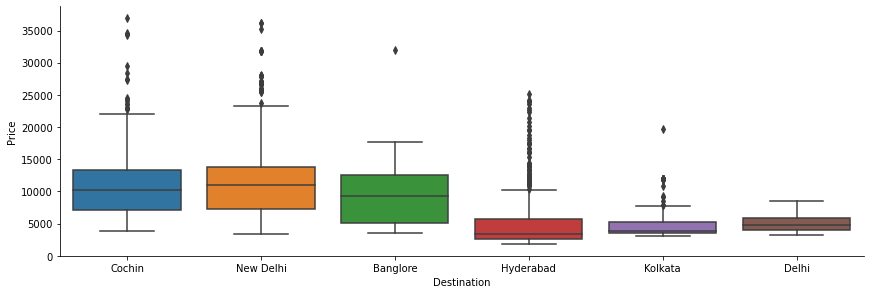

In [43]:
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

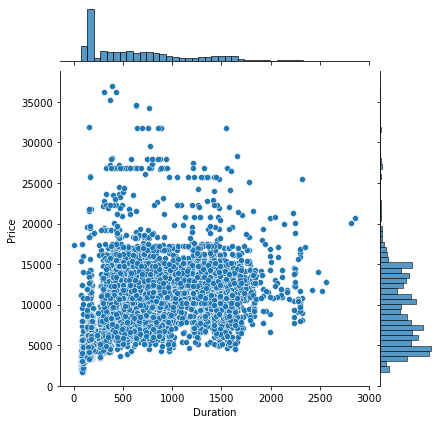

In [44]:
sns.jointplot(data=train_df, x = "Duration", y = "Price")
plt.show()

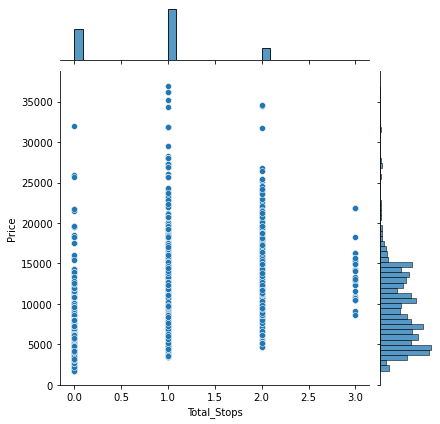

In [45]:
sns.jointplot(data=train_df, x = "Total_Stops", y = "Price")
plt.show()

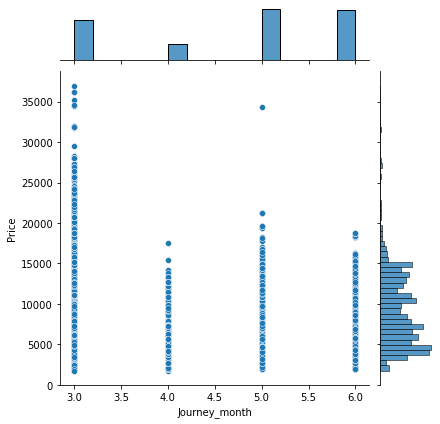

In [46]:
sns.jointplot(data=train_df, x = "Journey_month", y = "Price")
plt.show()

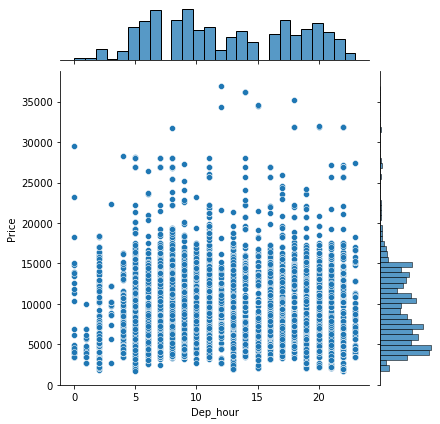

In [47]:
sns.jointplot(data=train_df, x = "Dep_hour", y = "Price")
plt.show()

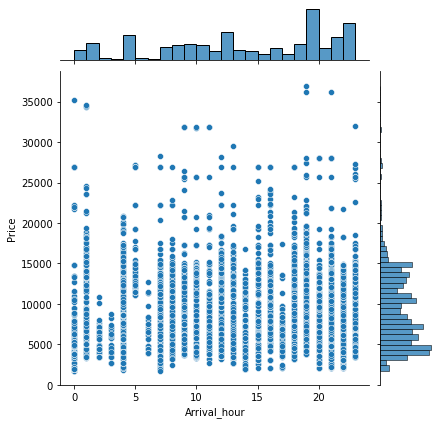

In [48]:
sns.jointplot(data=train_df, x = "Arrival_hour", y = "Price")
plt.show()

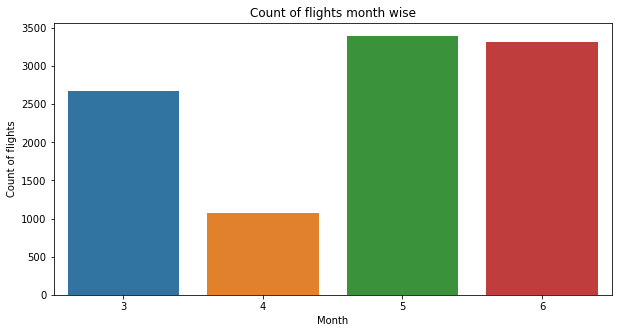

In [49]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.show()

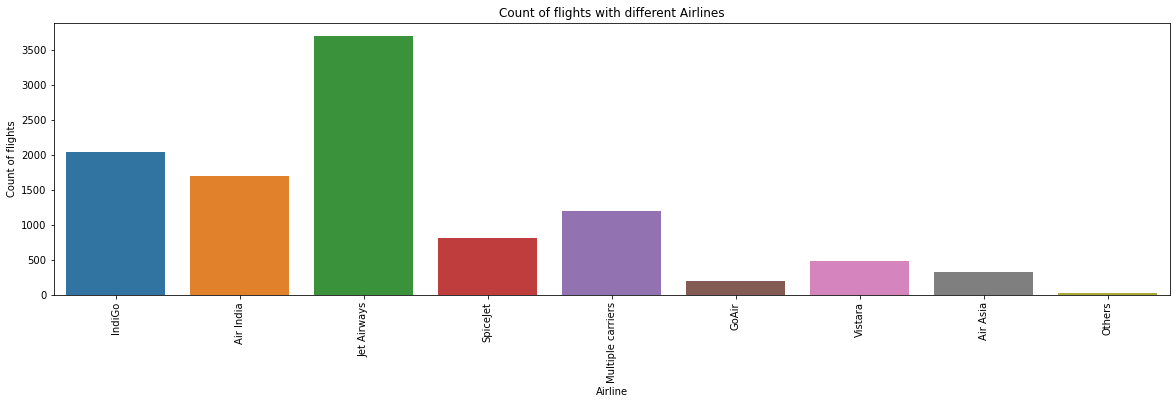

In [50]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

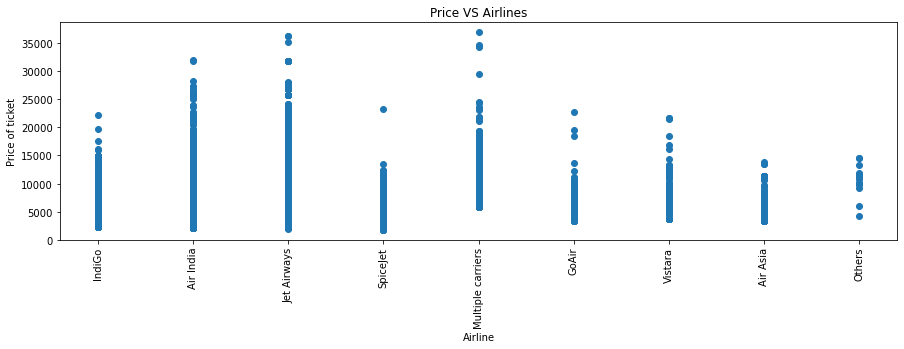

In [51]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.show()

### Correlation between all columns

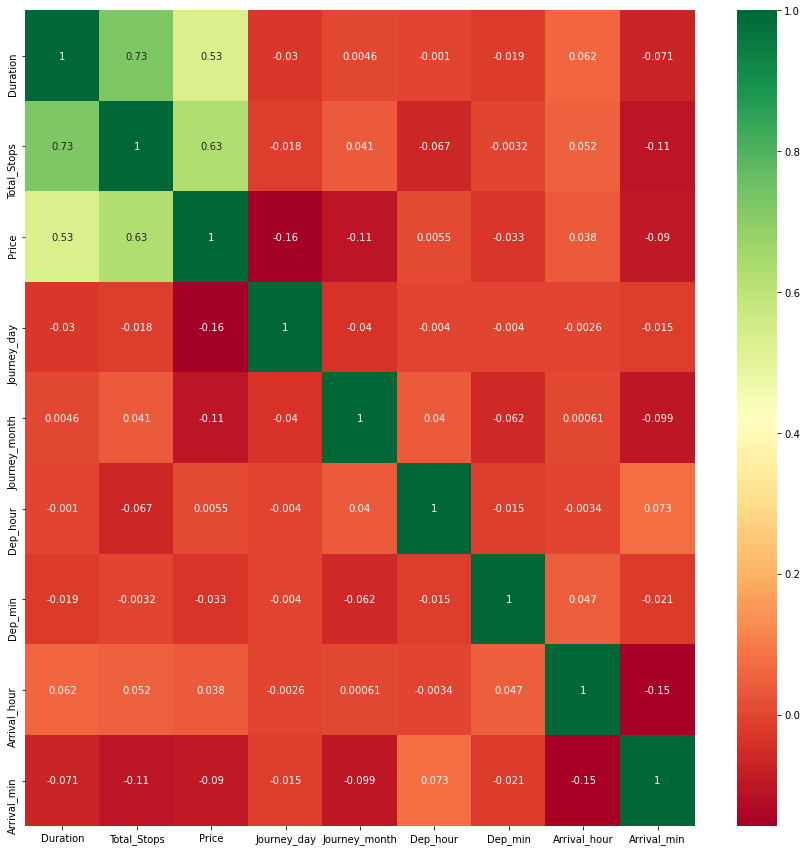

In [52]:
# Plotting Correation
plt.figure(figsize = (15,15))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Label Encoding

In [53]:
# Categorical Data and Numerical Data
train_categorical_data = train_df.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = train_df.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])

In [54]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [55]:
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(le.fit_transform)
test_categorical_data = test_categorical_data.apply(le.fit_transform)

In [56]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,17,2
1,1,3,0,83,2
2,4,2,1,117,2
3,3,3,0,90,2
4,3,0,5,28,2


In [57]:
test_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3
3,6,2,1,76,0,5
4,0,0,2,16,4,5


In [58]:
train_df = pd.concat([train_categorical_data, train_numerical_data], axis=1)
test_df = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [59]:
train_df.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,17,2,170,0,3897,24,3,22,20,1,10
1,1,3,0,83,2,445,2,7662,1,5,5,50,13,15
2,4,2,1,117,2,1140,2,13882,9,6,9,25,4,25
3,3,3,0,90,2,325,1,6218,12,5,18,5,23,30
4,3,0,5,28,2,285,1,13302,1,3,16,50,21,35


In [60]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,5,655,6,6,17,30,4,25
1,3,3,0,65,0,5,240,12,5,6,20,10,20
2,4,2,1,76,0,3,1425,21,5,19,15,19,0
3,6,2,1,76,0,5,780,21,5,8,0,21,0
4,0,0,2,16,4,5,170,24,6,23,55,2,45


### Splitting into Features and Target Variable

In [61]:
x = train_df.drop("Price",axis=1)
y = train_df["Price"]

### Scaling the values using Standard Scaler

In [62]:
#scaling the rain and test data using the standardscales
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)
testscaled = scaler.fit_transform(test_df)
x = pd.DataFrame(xscaled,columns=x.columns)
test_df = pd.DataFrame(testscaled,columns=test_df.columns)

In [63]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0.011908,0.032567,-0.294882,0.797952,-0.792411,0.480394,0.030389,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340
1,-0.423779,0.877086,-0.976222,0.392406,-0.792411,0.480394,-0.796151,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771
2,0.011908,0.032567,-0.294882,0.797952,-0.792411,-2.148975,1.563970,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213
3,0.883281,0.032567,-0.294882,0.797952,-0.792411,0.480394,0.279347,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213
4,-1.730840,-1.656471,0.386458,-1.414118,1.435515,0.480394,-0.935567,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783


In [64]:
x.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.361905,-1.649055,2.410203,-1.540731,0.511523,-0.918429,-1.214782,1.243847,-1.464278,1.662956,-0.233451,-1.807737,-0.888269
1,-1.404958,0.881298,-0.971925,0.262983,0.511523,-0.369233,1.815867,-1.473318,0.255247,-1.306132,1.361339,-0.057115,-0.586560
2,0.159621,0.037847,-0.295499,1.192169,0.511523,1.018734,1.815867,-0.528217,1.115009,-0.607523,0.032347,-1.370081,0.016858
3,-0.361905,0.881298,-0.971925,0.454286,0.511523,-0.608882,0.300542,-0.173804,0.255247,0.964347,-1.030846,1.401737,0.318567
4,-0.361905,-1.649055,2.410203,-1.240112,0.511523,-0.688765,0.300542,-1.473318,-1.464278,0.615043,1.361339,1.109967,0.620276


### Splitting the data into Train and Test 

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [66]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7316, 13)
The size of training output is (7316,)
The size of testing input is (3136, 13)
The size of testing output is (3136,)


### Model Building

### 1. Ridge Regression

In [67]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model1 = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
model1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [68]:
# Predicting train and test results
model1_train_pred = model1.predict(x_train)
model1_test_pred = model1.predict(x_test)

In [69]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, model1_train_pred)))
print("R-Squared: ", r2_score(y_train.values, model1_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3191.2056434225456
R-Squared:  0.47700909968153893


In [70]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, model1_test_pred)))
print("R-Squared: ", r2_score(y_test, model1_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3161.91123316642
R-Squared:  0.4740355249633086


### 2. Lasso Regression

In [71]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model2 = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
model2.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [72]:
# Predicting train and test results
model2_train_pred = model2.predict(x_train)
model2_test_pred = model2.predict(x_test)

In [73]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, model2_train_pred)))
print("R-Squared: ", r2_score(y_train.values, model2_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3211.4130574569854
R-Squared:  0.47036474314658305


In [74]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, model2_test_pred)))
print("R-Squared: ", r2_score(y_test, model2_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3170.0026443204156
R-Squared:  0.47134016772573817


### 3. Decision Tree Regression

In [75]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
model3 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
model3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [76]:
# Predicting train and test results
model3_train_pred = model3.predict(x_train)
model3_test_pred = model3.predict(x_test)

In [77]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, model3_train_pred)))
print("R-Squared: ", r2_score(y_train.values, model3_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  658.592507050644
R-Squared:  0.9777249790818765


In [78]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, model3_test_pred)))
print("R-Squared: ", r2_score(y_test, model3_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  1742.3921237400261
R-Squared:  0.840283838792536


### 4. Random Forest Regression

In [79]:
# Performing GridSearchCV on Random Forest Regression
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model4 = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
model4.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [80]:
# Predicting train and test results
model4_train_pred = model4.predict(x_train)
model4_test_pred = model4.predict(x_test)

In [81]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, model4_train_pred)))
print("R-Squared: ", r2_score(y_train.values, model4_train_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  533.787512210435
R-Squared:  0.9853674044523995


In [82]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, model4_test_pred)))
print("R-Squared: ", r2_score(y_test, model4_test_pred))

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  1407.7486120663493
R-Squared:  0.8957425062927308


### Model Ensembling

From the above Results we can see that Random Forest algorithm and Decision Tree Algorithm is only performing good while Ridge and Lasso regression are not performing well so only combinig the results of these 2 algorithms

In [83]:
# Defining the function which will take tast data as the arguments
# Predict the Final Predictions

def final_test_predictions(df):
    test_prediction_1 = model3.predict(df)
    test_prediction_2 = model4.predict(df)
    final_prediction = np.array([])
    for i in range(0,len(df)):
        final_prediction = np.append(final_prediction,mean([test_prediction_1[i],test_prediction_2[i]]))
    return final_prediction

In [84]:
final_test_predictions(test_df)

array([10284.45384615,  6798.56337931,  6150.158     , ...,
       13809.218     , 13740.516     ,  6795.734     ])